In [26]:
#imports
import pandas as pd
import numpy as np
import re
import missingno as msno


# Load Data

In [10]:
tourism_df=pd.read_excel("../data/Tourism.xlsx",sheet_name="Tourism")
tourism_df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [17]:
tourism_df.shape

(4888, 20)

## Check Data

In [14]:
tourism_df.isnull().any()

CustomerID                  False
ProdTaken                   False
Age                          True
TypeofContact                True
CityTier                    False
DurationOfPitch              True
Occupation                  False
Gender                      False
NumberOfPersonVisiting      False
NumberOfFollowups            True
ProductPitched              False
PreferredPropertyStar        True
MaritalStatus               False
NumberOfTrips                True
Passport                    False
PitchSatisfactionScore      False
OwnCar                      False
NumberOfChildrenVisiting     True
Designation                 False
MonthlyIncome                True
dtype: bool

In [20]:
null_tourism_df = tourism_df[tourism_df.isnull().any(axis=1)]
null_tourism_df

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
11,200011,0,NaN,Self Enquiry,1,21.0,Salaried,Female,2,4.0,Deluxe,3.0,Single,1.0,1,3,0,0.0,Manager,NaN
19,200019,0,NaN,Self Enquiry,1,8.0,Salaried,Male,2,3.0,Basic,3.0,Single,6.0,1,4,0,1.0,Executive,NaN
20,200020,0,NaN,Company Invited,1,17.0,Salaried,Female,3,2.0,Deluxe,3.0,Married,1.0,0,3,1,2.0,Manager,NaN
21,200021,1,NaN,Self Enquiry,3,15.0,Salaried,Male,2,4.0,Deluxe,5.0,Single,1.0,0,2,0,0.0,Manager,18407.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4850,204850,1,46.0,Self Enquiry,3,8.0,Salaried,Male,4,5.0,Deluxe,5.0,Married,NaN,0,4,1,3.0,Manager,36739.0
4851,204851,1,40.0,Self Enquiry,1,9.0,Salaried,Female,4,4.0,Basic,5.0,Married,NaN,1,1,1,1.0,Executive,35801.0
4868,204868,1,43.0,Company Invited,2,15.0,Salaried,Female,4,5.0,Basic,3.0,Married,NaN,0,5,1,2.0,Executive,36539.0
4869,204869,1,56.0,Self Enquiry,3,16.0,Small Business,Female,3,6.0,Basic,4.0,Single,NaN,0,1,1,2.0,Executive,37865.0


In [33]:
percent_null = round((null_tourism_df.shape[0]/tourism_df.shape[0])*100,2)

print(f"{percent_null}% of the rows contain a null values")

15.55% of the rows contain a null values


In [24]:
# number of null values per feature
tourism_df.isnull().sum(axis = 0)

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

<AxesSubplot:>

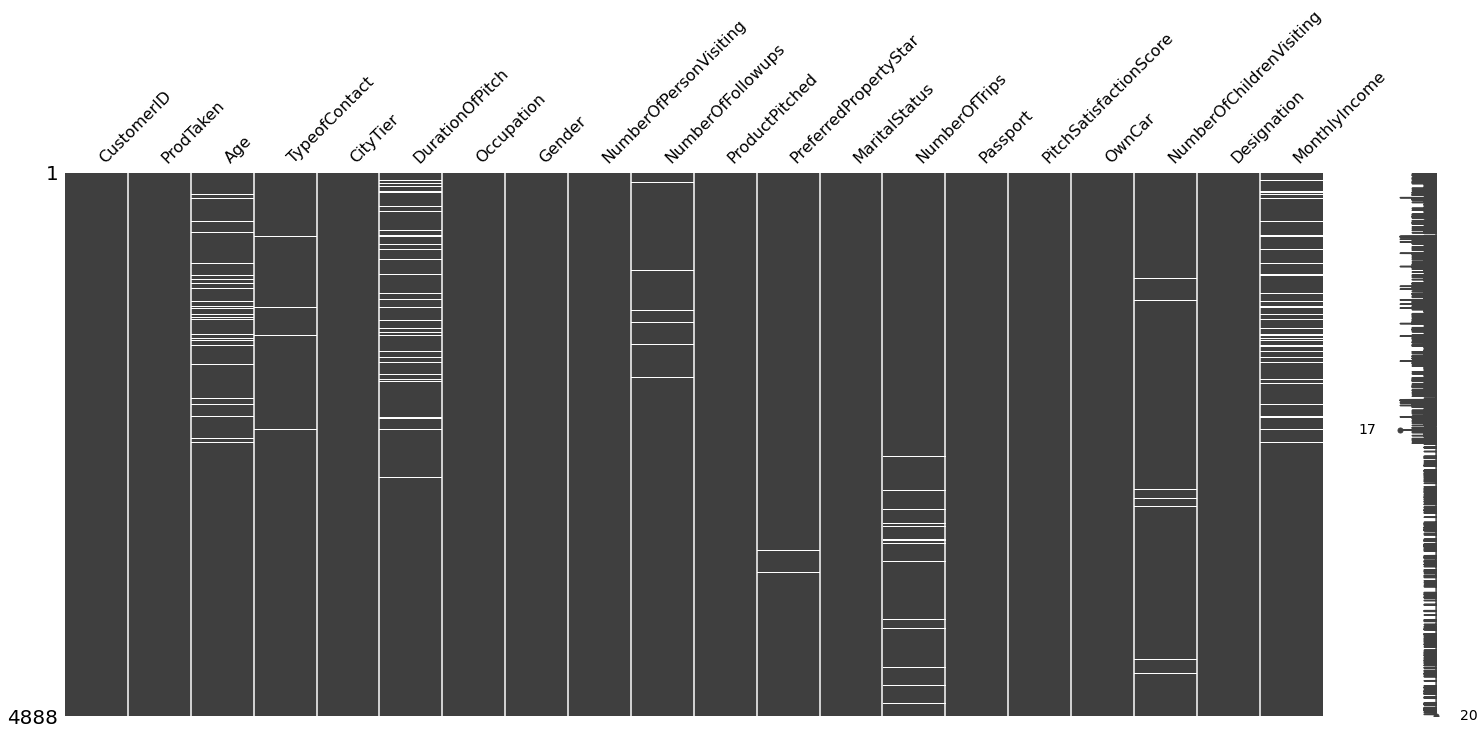

In [27]:
# a a plot of the missing values based on feature designation
msno.matrix(tourism_df)

<AxesSubplot:>

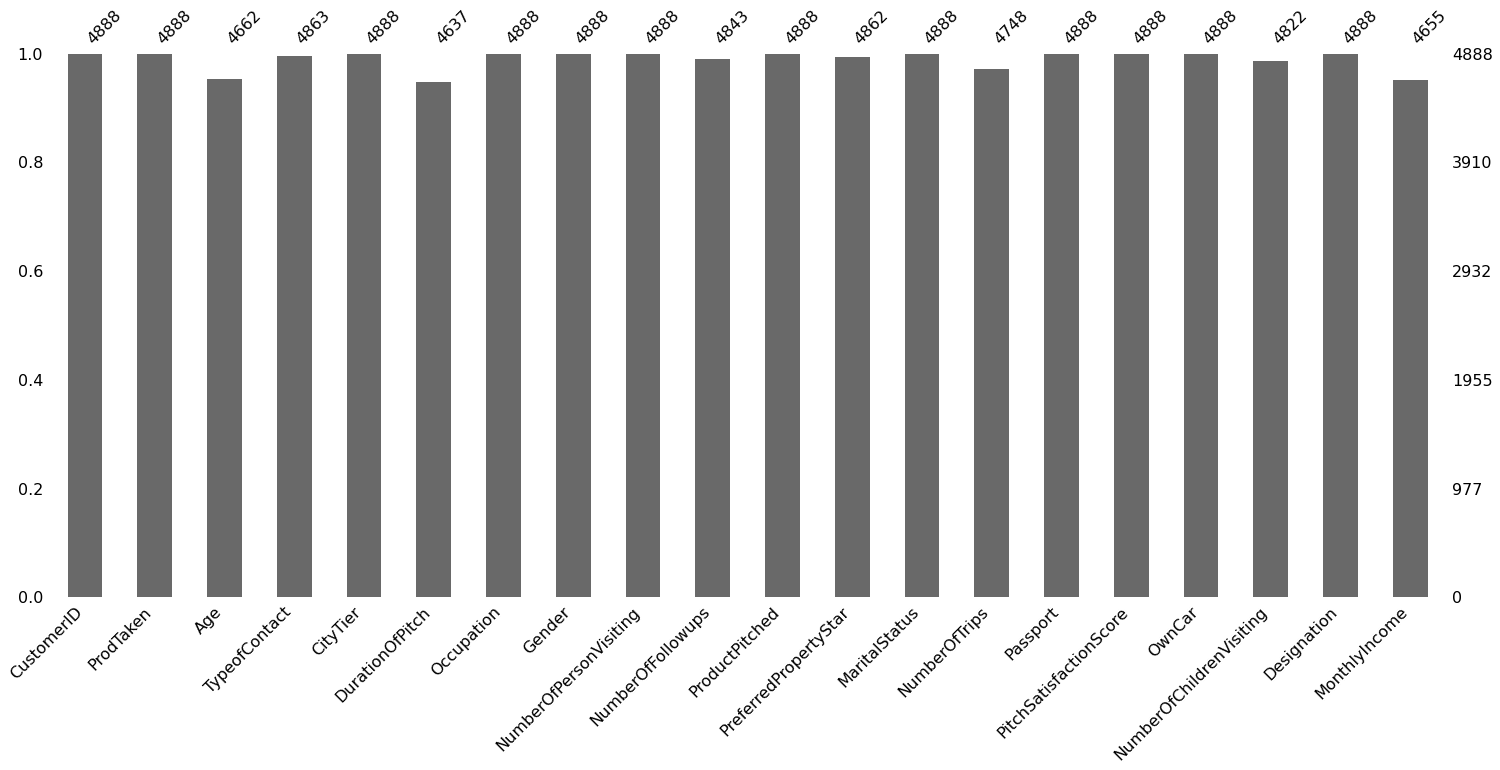

In [32]:
# a plot of each feature's count of missing data

msno.bar(tourism_df)

<AxesSubplot:>

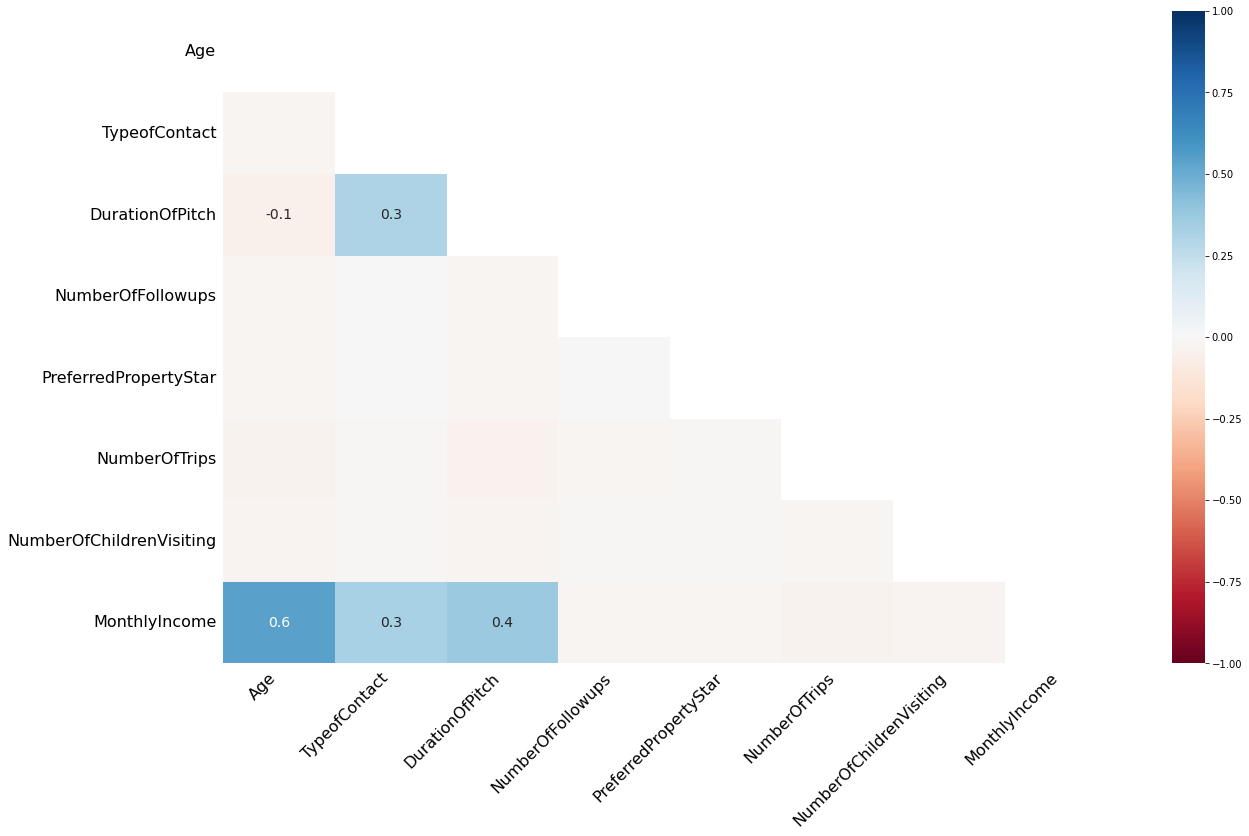

In [34]:
# heatmap on nullity correlation

msno.heatmap(tourism_df)

<AxesSubplot:>

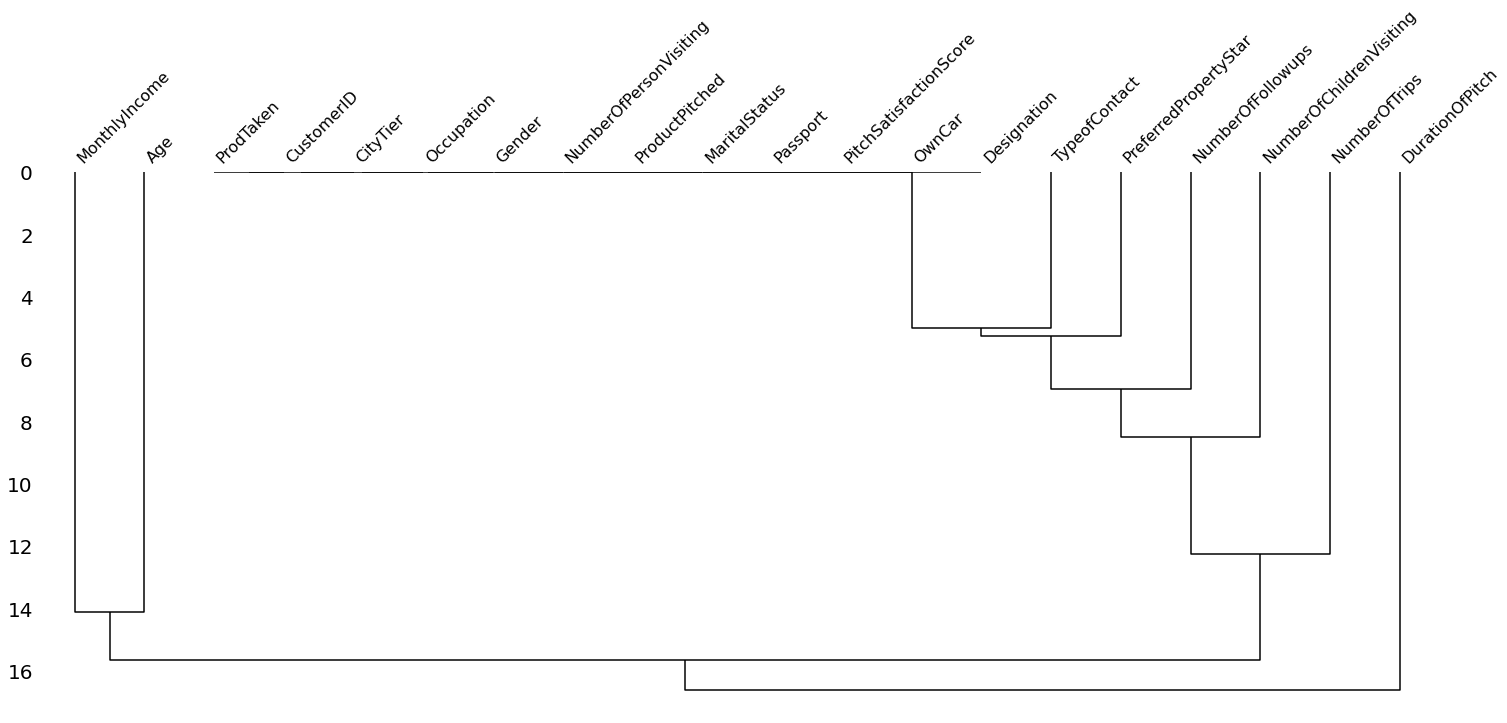

In [35]:
# 
msno.dendrogram(tourism_df)

From the visualizations above, we may be able to imput monthly income and/or age using each other. 

# Clean Data

## Check Missing Data for Imputation Possibilities

# Save Data